## Reading and writing files

In [4]:
import numpy as np

In [8]:
# Reading text and csv files with no missing values use numpy.loadtxt
# Reading text and csv files with missing values use numpy.genfromtxt


# return a masked array masking out missing values (if usemask=True) or fill in the missing value with the value specified in filling_values


# With non-whitespace delimiters

with open('csv.txt', 'r') as f:
    print(f.read())

1, 2, 3
4,, 6
7, 8, 9


Masked array output

In [9]:
np.genfromtxt('csv.txt', delimiter=',', usemask=True)


masked_array(
  data=[[1.0, 2.0, 3.0],
        [4.0, --, 6.0],
        [7.0, 8.0, 9.0]],
  mask=[[False, False, False],
        [False,  True, False],
        [False, False, False]],
  fill_value=1e+20)

In [10]:
# One can also fill the values using
np.genfromtxt("csv.txt", delimiter=",", dtype=np.int8, filling_values=99)

array([[ 1,  2,  3],
       [ 4, 99,  6],
       [ 7,  8,  9]], dtype=int8)

Whitespace-delimited

In [13]:
# numpy.genfromtxt can also parse whitespace-delimited data files that have missing values if each field has a fixed width


# File with width=4. The data does not have to be justified, the last column can be less than width and delimiting character is required

with open('fixedwidth.txt','r') as f:
    data = (f.read())
print(data)

1   2      3
44      6
7   88889


In [14]:
# Showing spaces as ^

print(data.replace(" ", "^"))

1^^^2^^^^^^3
44^^^^^^6
7^^^88889


In [16]:
np.genfromtxt('fixedwidth.txt', delimiter=4)


array([[1.000e+00, 2.000e+00, 3.000e+00],
       [4.400e+01,       nan, 6.000e+00],
       [7.000e+00, 8.888e+03, 9.000e+00]])

## Where can the masked arrays be useful

In [28]:
# There are a few situations where masked arrays can be more useful than just eliminating the invalid entries of an array

# When you want to preserve the values you masked for later processing.without copying the array.

import numpy as np
import os

# The os.getcwd() function returns the current folder; you can change
# The filepath variable to point to the folder where you saved the .csv file

filepath = os.getcwd()
filename = os.path.join(filepath,'time_series_covid19_deaths_US.csv')

In [29]:
filepath

'/home/susearc/Documents/github/Py_QuickNotes/numpy'

In [30]:
# The data file contains data of different types and is organized as follows:

# The first row is a header line that mostrly describes the data in each column that follow in the rows below, and beginning in ther fourth column, the header is the date of the observation

In [46]:
# We will be using skip_header and usecols to read only portions of the data file into each variable Read just the dates for columns 4-18 from the first row

dates = np.genfromtxt(
    filename,
    dtype=np.unicode_,
    delimiter=",",
    max_rows=2,
    usecols=range(4, 18),
    encoding='utf-8-sig'
)

In [47]:
dates

array([['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat',
        'Long_', 'Combined_Key', 'Population', '1/22/20', '1/23/20',
        '1/24/20', '1/25/20', '1/26/20', '1/27/20'],
       ['1001.0', 'Autauga', 'Alabama', 'US', '32.53952745',
        '-86.64408227', '"Autauga', ' Alabama', ' US"', '55869', '0',
        '0', '0', '0']], dtype='<U14')

In [37]:
# Read the names of the geographic locations from teh first two
# columns, skipping the first six rows

locations=np.genfromtxt(
    filename,
    dtype=np.unicode_,
    delimiter=',',
    skip_header=6,
    usecols=(6,7),
    encoding='utf-8-sig'
)

In [38]:
locations

array([['Alabama', 'US'],
       ['Alabama', 'US'],
       ['Alabama', 'US'],
       ...,
       ['Wyoming', 'US'],
       ['Wyoming', 'US'],
       ['Wyoming', 'US']], dtype='<U24')

In [39]:
# Read the numeric data from just the first 14 days

nbcases = np.genfromtxt(
    filename,
    dtype=np.int_,
    delimiter=',',
    skip_header=6,
    usecols=range(4, 18),
    encoding='utf-8-sig'
)

In [40]:
nbcases

array([[-1, -1, -1, ...,  0,  0,  0],
       [-1, -1, -1, ...,  0,  0,  0],
       [-1, -1, -1, ...,  0,  0,  0],
       ...,
       [-1, -1, -1, ...,  0,  0,  0],
       [-1, -1, -1, ...,  0,  0,  0],
       [-1, -1, -1, ...,  0,  0,  0]])

## Exploring the data

In [42]:
dates

array(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20'],
      dtype='<U14')

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 ')

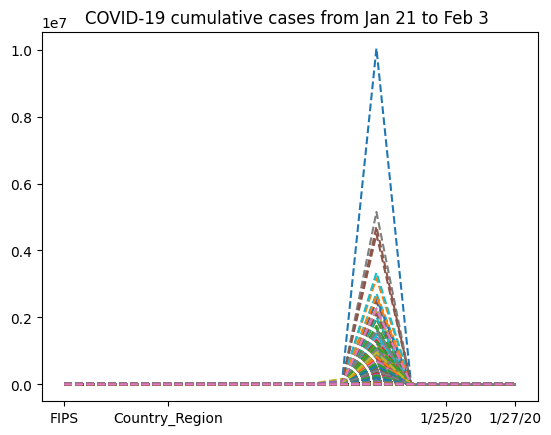

In [45]:
# First of all, we can plot the whole set of data we have and see what it looks like. In order to get a readable plot, we select only a few of the dates to show in our x-axis ticks. Not ealso that in our plot command we use nbcases.T since this means we will plot each row of the file as a separate line. We choose to plot a dashed line


import matplotlib.pyplot as plt


selected_dates = [0,3,11,13]
plt.plot(dates, nbcases.T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title('COVID-19 cumulative cases from Jan 21 to Feb 3 ')